In This Python Notebook I am working a sample data csv file that contain contionous Numerical Data i am going to explore distribution and others thing too.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sample_distribution_data.csv",)

In [3]:
df.head()

,Normal_Distribution,Skewed_Distribution,Bimodal_Distribution
0,54.967142,3.666023,28.453955
1,48.617357,2.208976,26.239218
2,56.476885,20.235682,31.595873
3,65.230299,24.515899,36.702252
4,47.658466,0.641915,20.624138


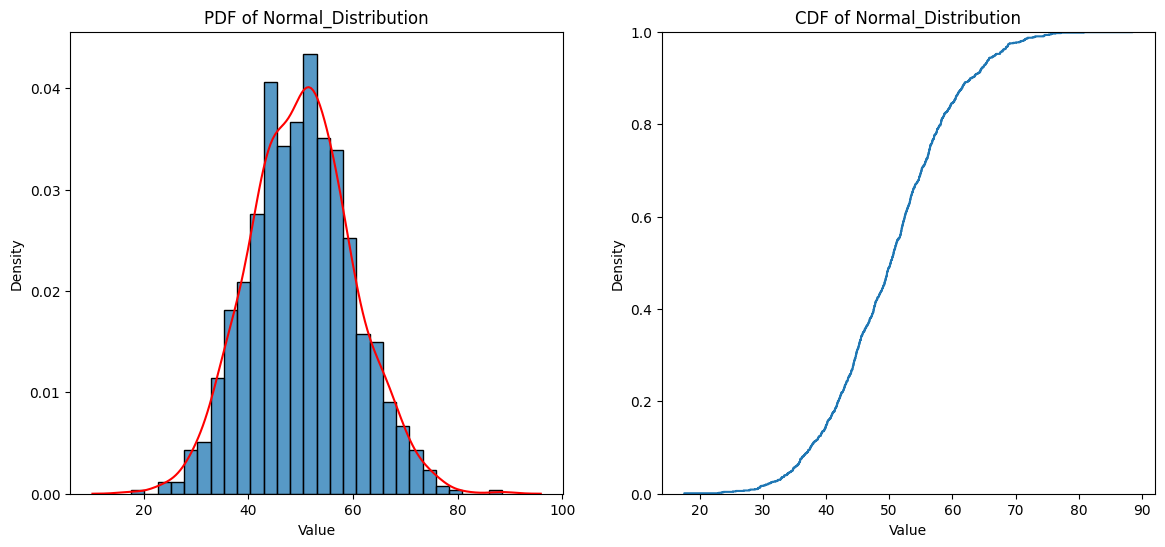

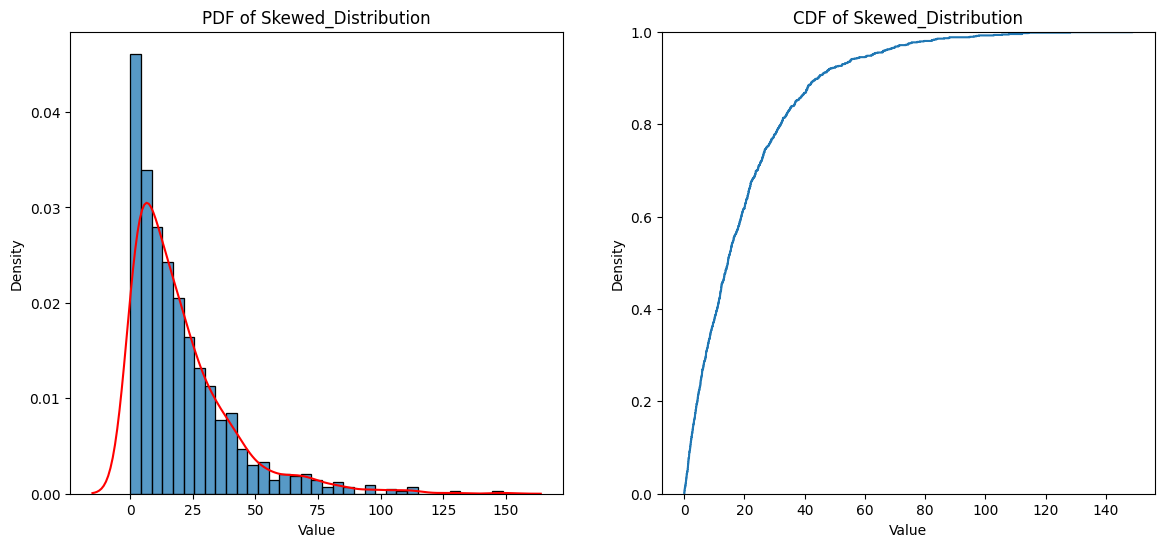

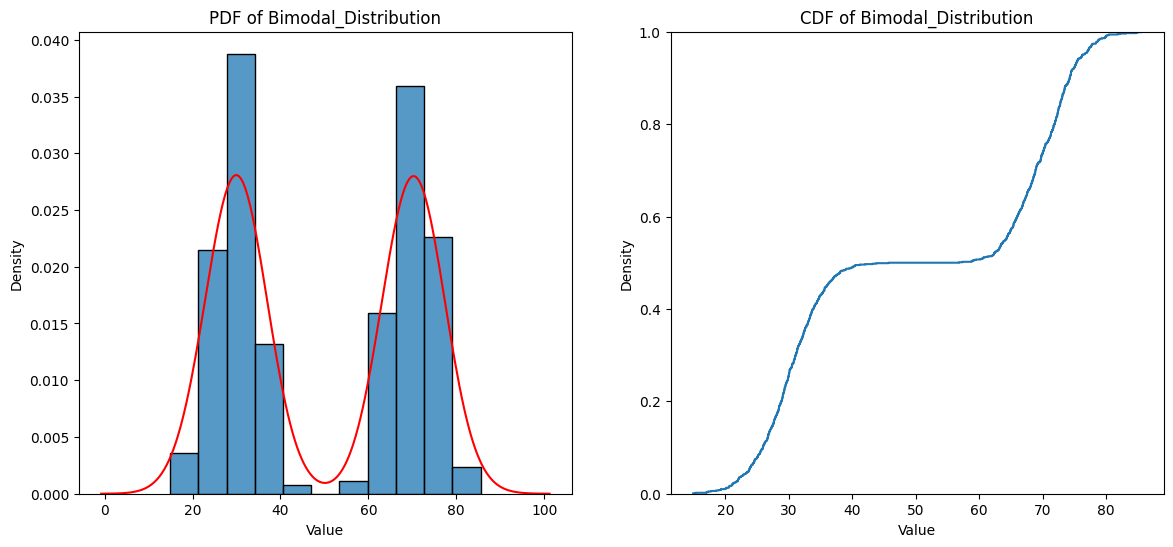

In [4]:

for col in df.columns:
    fig ,axes = plt.subplots(1,2,figsize = (14,6))

    sns.histplot(data = df , x = col,ax = axes[0],stat="density")
    sns.kdeplot(data = df , x = col , ax = axes[0],color = 'red')
    axes[0].set_title("PDF of " + col)
    axes[0].set_xlabel("Value")
    axes[0].set_ylabel("Density")

    sns.ecdfplot(data=df,x=col,ax = axes[1])
    axes[1].set_title("CDF of " + col)
    axes[1].set_xlabel("Value")
    axes[1 ].set_ylabel("Density")

    plt.plot()

In [5]:
for col in df.columns:
    print(f'Skewness of {col} = {round(df[col].skew(),3)}')
print("_-----------------------------------------------_")
for col in df.columns:
    print(f'Kurtosis of {col} = {round(df[col].kurt(),3)}')

Skewness of Normal_Distribution = 0.117
Skewness of Skewed_Distribution = 1.984
Skewness of Bimodal_Distribution = -0.002
_-----------------------------------------------_
Kurtosis of Normal_Distribution = 0.073
Kurtosis of Skewed_Distribution = 5.412
Kurtosis of Bimodal_Distribution = -1.789


Here we can see that:-

    Noraml_Distribution columns have skewness = 0.117 that show column is semmetric
    Normal_Distribution columns have Kurtosis = 0.073 which show it is Normal tails

    Skewed_Distribution columns have skewness = 1.984 it show it skewed column and it is right skewed distribution.
    skewed_Distribution columns have kurtosis = 5.412 it show it have heavy tails(Leptokurtic) more outliers is there.

    bimodel_distribution show it has skewness = -0.002 it show it almost perfectly semmetric
    bimodel_sistribution show it has kurtosis = -1.789 it is platykurtosis and light tails less outliers is there.

# Empirical_Rule

In [6]:
data = df["Normal_Distribution"]
data_mean = data.mean()
data_std = data.std()


In [7]:
data_range_1sd = data[(data > (data_mean - data_std)) & (data < (data_mean + data_std))]
data_range_2sd = data[(data > (data_mean - 2*data_std)) & (data < (data_mean + 2*data_std))]
data_range_3sd = data[(data > (data_mean - 3*data_std)) & (data < (data_mean + 3*data_std))]

In [8]:
print("Percentage of data lie between 1sd = ",(len(data_range_1sd)/len(data))*100)
print("Percentage of data lie between 2sd = ",(len(data_range_2sd)/len(data))*100)
print("Percentage of data lie between 3sd = ",(len(data_range_3sd)/len(data))*100)

Percentage of data lie between 1sd =  68.60000000000001
Percentage of data lie between 2sd =  95.6
Percentage of data lie between 3sd =  99.7


In [9]:
data_range_1sd = data[(data > data_mean) & (data < (data_mean + data_std))]
data_range_2sd = data[(data > data_mean) & (data < (data_mean + 2*data_std))]
data_range_3sd = data[(data > data_mean) & (data < (data_mean + 3*data_std))]

In [10]:
print("Percentage of data lie between 1sd = ",(len(data_range_1sd)/len(data))*100)
print("Percentage of data lie between 2sd = ",(len(data_range_2sd)/len(data))*100)
print("Percentage of data lie between 3sd = ",(len(data_range_3sd)/len(data))*100)

Percentage of data lie between 1sd =  34.699999999999996
Percentage of data lie between 2sd =  47.8
Percentage of data lie between 3sd =  50.0


# Outlier Detection

### Using Z-score

In [11]:
def outlier_z_score(data):
    data_mean = data.mean()
    data_std = data.std()
    data_z_score = (data - data_mean)/data_std
    return data[(data_z_score < -3) | (data_z_score > 3)]


In [12]:
outlier_z_score(df["Bimodal_Distribution"])

Series([], Name: Bimodal_Distribution, dtype: float64)

In [13]:
outlier_z_score(df["Normal_Distribution"])

209    88.527315
262    17.587327
478    80.788808
Name: Normal_Distribution, dtype: float64

In [14]:
outlier_z_score(df["Skewed_Distribution"])

37     112.172625
52      87.881278
128     86.295022
168    148.834458
288     88.102663
295     94.787736
320    102.789933
342     97.813099
368     96.965265
419    105.438640
422     82.305962
431    114.257598
568     83.558532
593     96.096709
616    112.174925
658    128.109458
782     83.980314
813     82.113942
828     82.841708
947    107.797762
Name: Skewed_Distribution, dtype: float64

### Using IQR

In [15]:
def outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3-Q1

    lower_bond = Q1 - 1.5*IQR # Formula for Min value of Data Excluding Outlier
    upper_bond = Q3 + 1.5*IQR # Formula for Max Value of Data Excluding Outlier

    return data[(data < lower_bond) | (data > upper_bond)]
    

In [16]:
outliers_IQR(df["Bimodal_Distribution"])

Series([], Name: Bimodal_Distribution, dtype: float64)

In [17]:
outliers_IQR(df["Normal_Distribution"])

74     23.802549
179    77.201692
209    88.527315
262    17.587327
478    80.788808
646    23.031134
668    23.490302
755    76.323821
Name: Normal_Distribution, dtype: float64

In [18]:
outliers_IQR(df["Skewed_Distribution"])

28      74.482056
37     112.172625
38      73.612800
52      87.881278
74      71.083541
86      69.743161
92      70.012209
128     86.295022
129     67.116086
131     60.652816
144     70.072608
168    148.834458
170     75.597262
216     62.255975
248     65.897259
254     60.484010
288     88.102663
295     94.787736
320    102.789933
327     63.224069
342     97.813099
368     96.965265
385     74.271806
402     65.999067
404     67.523557
419    105.438640
422     82.305962
431    114.257598
458     74.489100
460     64.166951
477     62.171161
504     62.700530
519     68.753100
531     69.148231
534     78.210811
568     83.558532
593     96.096709
610     63.436734
616    112.174925
658    128.109458
700     62.752656
724     66.151100
731     79.581524
737     71.514823
782     83.980314
795     66.751303
813     82.113942
826     68.301838
828     82.841708
869     77.364848
904     75.272343
917     65.834499
947    107.797762
978     60.128203
990     71.179978
Name: Skew

### IQR detected More Outlier then Z_score Why ?

Z-score is strict and assumes normal distribution

    In normal distribution, very few points fall beyond ±3 z-score (about 0.3% of data).

    If your data is skewed or heavy-tailed, z-score method will miss some outliers because it expects most data to fall within ±3 range.

IQR does not assume normality

    IQR is based on percentiles (Q1 and Q3) — so it works even when data is skewed, bimodal, or non-normal.

    It finds outliers if they lie outside 1.5×IQR range, which is often broader and catches more extreme points.

    This is why IQR usually detects more outliers in real-world (non-normal) data.

Z-score is strict and best when data is normal.

IQR is flexible and works on skewed or non-normal data — so it often finds more outliers.

# QQ-Plot

<Axes: xlabel='Normal_Distribution', ylabel='Density'>

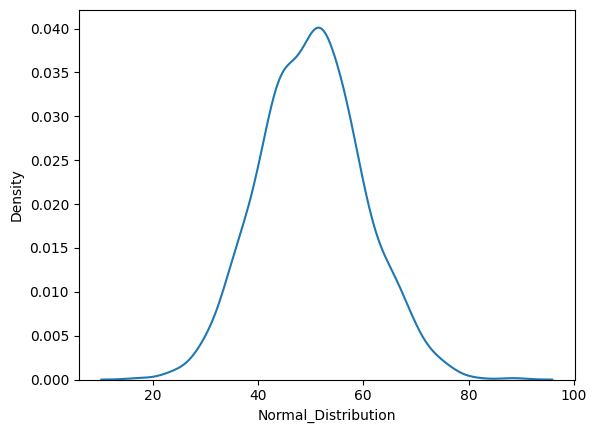

In [19]:
sns.kdeplot(data = df["Normal_Distribution"])

In [20]:
sample = np.random.normal(loc = df["Normal_Distribution"].mean() , 
                                 scale=df["Normal_Distribution"].std(),
                                 size = 1000)

<Axes: ylabel='Density'>

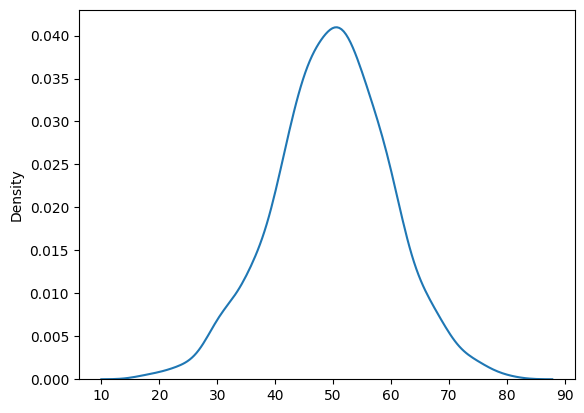

In [21]:
sns.kdeplot(sample)

In [22]:
sample = sorted(sample)
x_quant = []
for i in range(1,101):
    x_quant.append(np.percentile(sample,i))

In [23]:
temp = sorted(df["Normal_Distribution"].tolist())
y_qunat = []
for i in range(1,101):
    y_qunat.append(np.percentile(temp,i))

<Axes: >

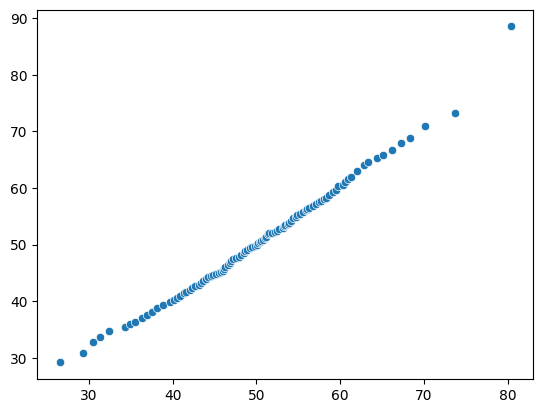

In [24]:
sns.scatterplot(x= x_quant , y = y_qunat)

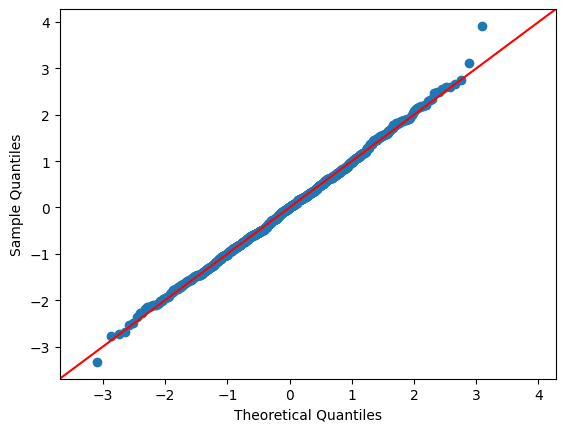

In [25]:
# using StatsModel 
import statsmodels.api as sm

# Creating a StatsModel
sm.qqplot(df["Normal_Distribution"],line = '45' , fit = True)
plt.show()

[]

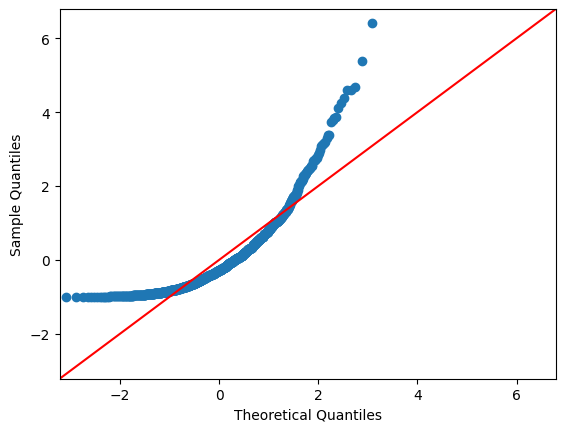

In [26]:
sm.qqplot(data = df["Skewed_Distribution"] , line = '45' , fit = True)
plt.plot()

[]

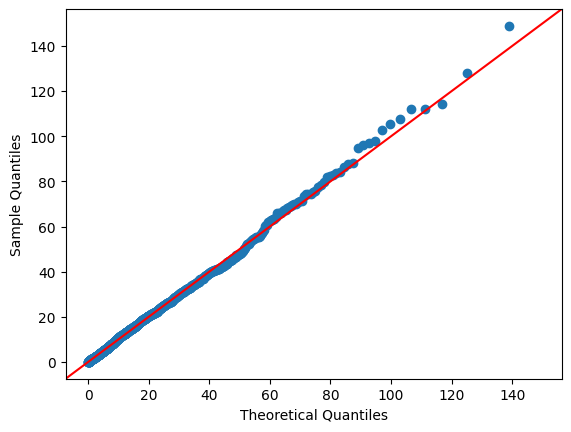

In [27]:
import scipy.stats as stats
params = stats.expon.fit(df["Skewed_Distribution"])
dist = stats.expon(loc = params[0] , scale = params[1])
sm.qqplot(data = df["Skewed_Distribution"] ,dist = dist, line = '45')
plt.plot()

[]

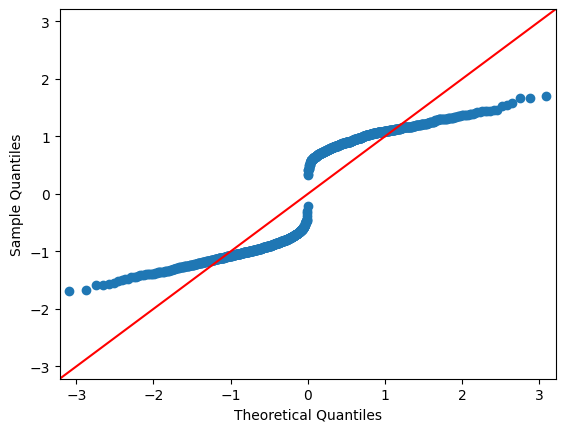

In [28]:
sm.qqplot(data = df["Bimodal_Distribution"] , line = '45' , fit = True)
plt.plot()

##### According to current research i am not able to find out how to check bimodel using same method of that we use for skewed_distribution(Right_skewed)

### Log - Normal Distribuiton :- 

In [29]:
data = np.random.lognormal(mean = 0 , sigma = 0.5 , size = 1000)

<Axes: ylabel='Density'>

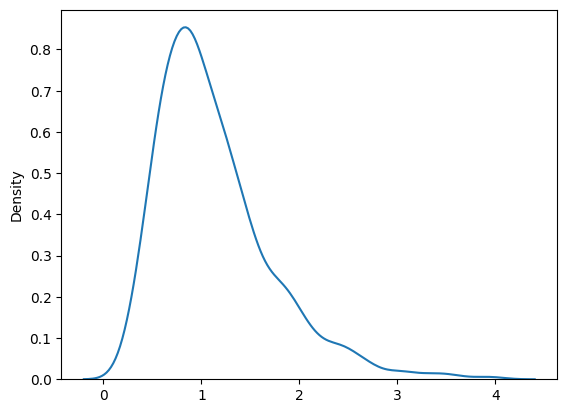

In [30]:
sns.kdeplot(data=data)

In [32]:
# Cheking it is log- normal Distribution
lg_data = np.log(data)

[]

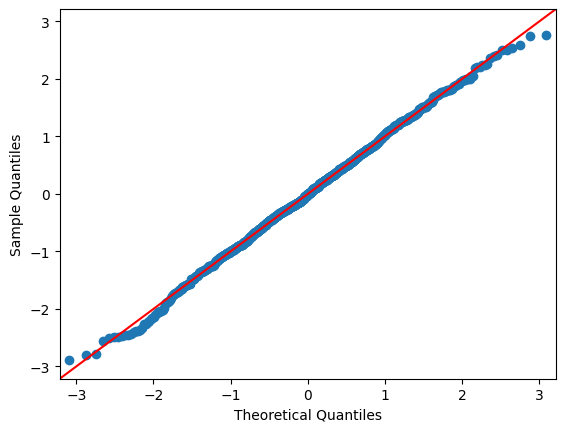

In [34]:
sm.qqplot(data = lg_data , line = '45' , fit = True)
plt.plot()

### Pareto Distribution :- 

In [36]:
alpha = 2
xm = 1 

x = stats.pareto.rvs(b= alpha , scale = xm , size = 1000)

(array([963.,  29.,   3.,   1.,   2.,   0.,   0.,   1.,   0.,   1.]),
 array([ 1.00058918,  6.39985837, 11.79912755, 17.19839674, 22.59766593,
        27.99693511, 33.3962043 , 38.79547349, 44.19474267, 49.59401186,
        54.99328105]),
 <BarContainer object of 10 artists>)

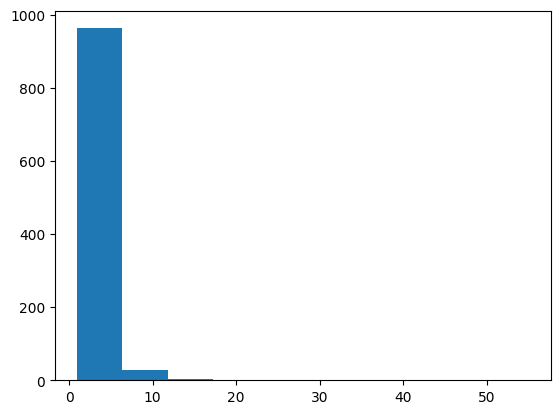

In [39]:
plt.hist(x)

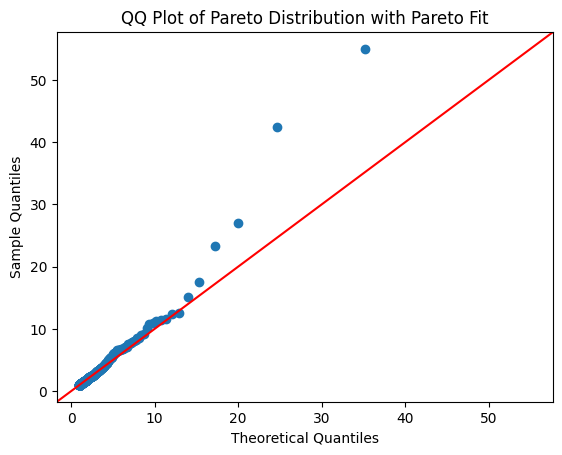

In [40]:
params = stats.pareto.fit(x , floc = 0)
dist = stats.pareto(b=params[0], scale=params[2])


# Create a QQ plot of the data using the Pareto distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()